In [3]:
%matplotlib inline

Read individual CVS files, add the date when data was collected as the last field and concatenate them all into one big file.

In [4]:
import os
import re

baseDir = os.path.join("data", "storm")
inputDir = os.path.join(baseDir, "input")
outputDir = os.path.join(baseDir, "output")
outputFile = os.path.join(outputDir, "bolt_data.csv")

# regex to match our bolt data files (bolts_20150923.csv)
filePattern = re.compile(r"^bolts_(\d{8})\.csv$")
mergedFile = open(outputFile, "w")
# each CSV file has a header, which needs to be thrown away, with the exception 
# of the very first one, which we keep as the header of the concatenated file
veryFirst = True

for f in os.listdir(inputDir):
    fileName = os.path.join(inputDir, f)
    if os.path.isfile(fileName):
        match = filePattern.match(f)
        if match:
            with open(fileName, "r") as daily:
                first = True
                for line in daily:
                    if veryFirst:
                        veryFirst = False
                        # header for the output file will be the header of the small file + date header
                        line = line.rstrip("\n").rstrip("\r") + ",\"date\"\n"
                        mergedFile.write(line)
                    elif first:
                        first = False
                    else:
                        date = match.groups()[0]
                        # add the date extracted from the file name as a column
                        #line = line.rstrip("\n").rstrip("\r") + ",\"" + date[0:4] + "-" + date[4:6] + "-" + date[6:8] + "\"\n"
                        line = line.rstrip("\n").rstrip("\r") + ",\"" + date + "\"\n"
                        mergedFile.write(line)
mergedFile.close()
#print file("bolt_data.csv").read()

In [5]:
import pandas as pd

boltData = pd.read_csv(outputFile, parse_dates=[3])
boltData.sort(columns=["total_time"], ascending=False).head(15)

,bolt,total_messages,total_time,date
965,AmqpQueueWriterBolt,592727,3586678.448,2015-10-14
927,AmqpQueueWriterBolt,648047,3586555.234,2015-10-13
1001,AmqpQueueWriterBolt,579854,3476004.229,2015-10-15
1337,AmqpQueueWriterBolt,379545,3263198.980,2015-10-24
1039,AmqpQueueWriterBolt,575336,3133674.906,2015-10-16
780,AmqpQueueWriterBolt,593494,3127517.596,2015-10-09
960,DataLimitingBolt,4988048808,3097940.689,2015-10-14
923,DataLimitingBolt,5233558806,3096758.882,2015-10-13
918,PersistedMessageFilterBolt,2376070834,3095656.015,2015-10-13
955,PersistedMessageFilterBolt,2265849350,3092764.420,2015-10-14


In [6]:
pd.unique(boltData.bolt)

array(['CstoneAuditMessageBolt', 'VitalSignBolt', 'DVMaxDataExtractorBolt',
       'CornerstoneDataExtractorBolt', 'PracticePatientBolt',
       'ExtractMessagePreProcessorBolt', 'PracticePetOwnerBolt',
       'AvimarkDataExtractorBolt', 'EntityMapDiscriminatorBolt',
       'FieldStandardizerBolt', 'PetOwnerPatientBolt',
       'MedicalNoteFileProcessorBolt', 'ReminderTypeBolt',
       'MedicalNoteBolt', 'VaccinationPimsBolt',
       'CornerstoneEncryptedFileProcessorBolt', 'ProductBolt',
       'SoftwareDiscriminatorBolt', 'PracticeExtractMessageBolt',
       'HashWriterBolt', 'PersistedMessageFilterBolt',
       'MedicalNoteAttachmentBolt', 'PracticeLogoFileProcessorBolt',
       'TransactionBolt', 'StaffMemberBolt', 'DataLimitingBolt',
       'ItemReminderTypeBolt', 'MedicalReminderBolt', 'AppointmentBolt',
       'PrescriptionBolt', 'AmqpQueueWriterBolt', 'PracticeBolt',
       'LabResultHeaderBolt', 'FieldMapperBolt', 'PersistenceRoutingBolt',
       'PracticePatientImageBolt', 'P

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

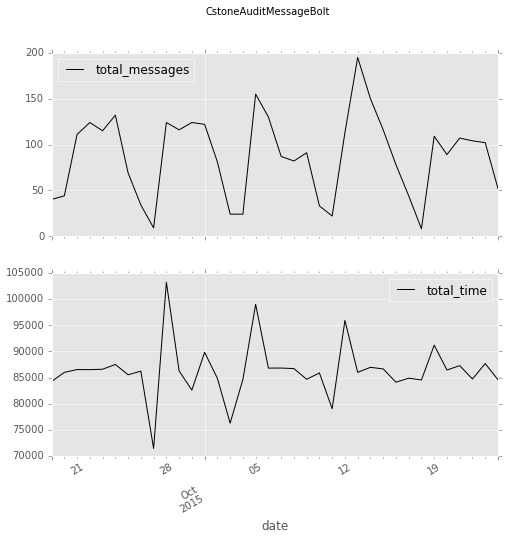

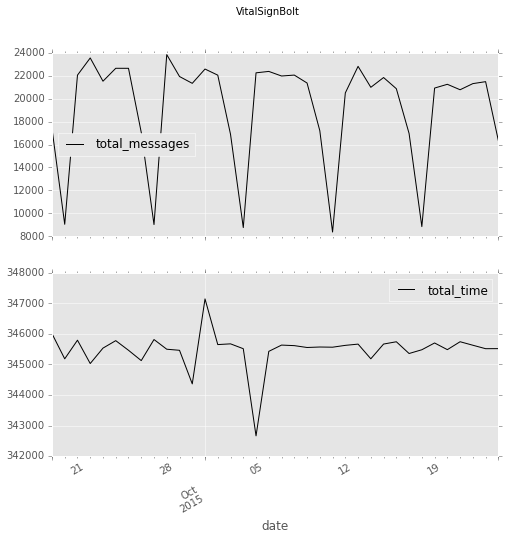

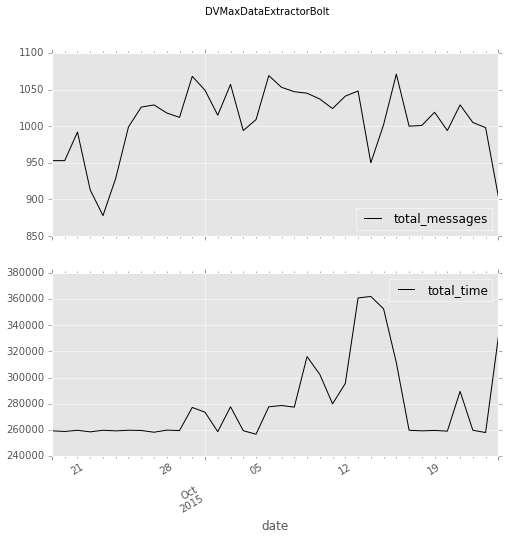

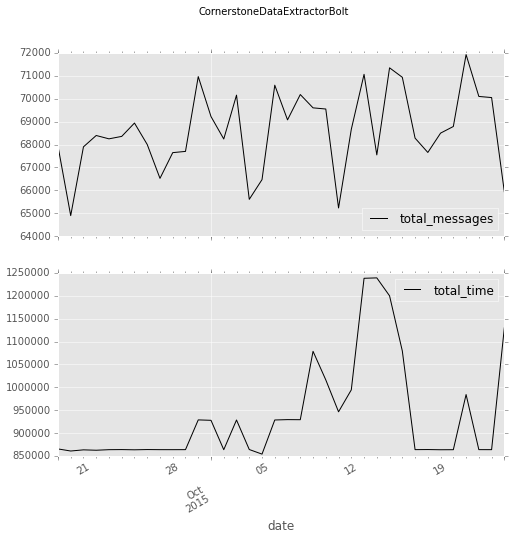

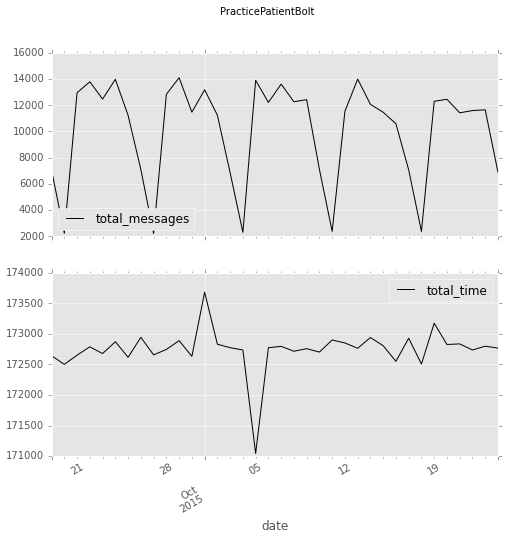

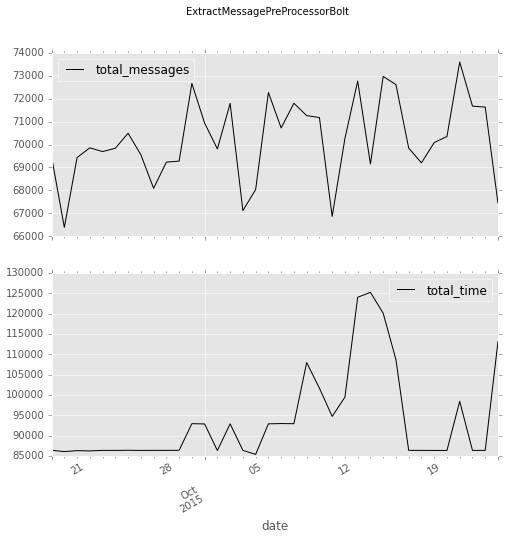

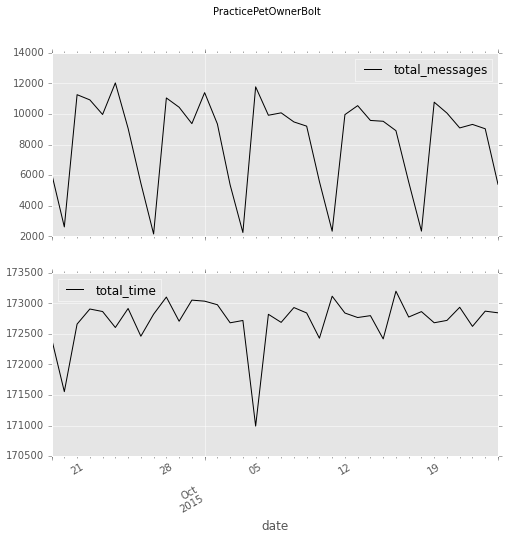

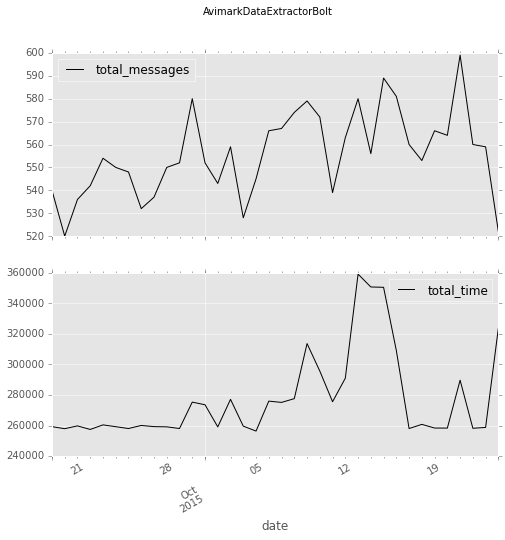

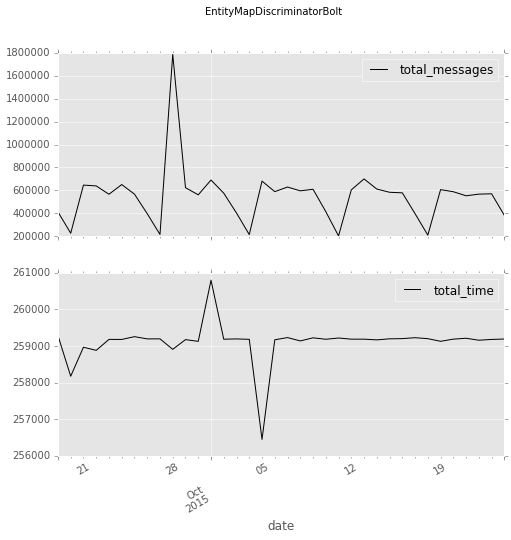

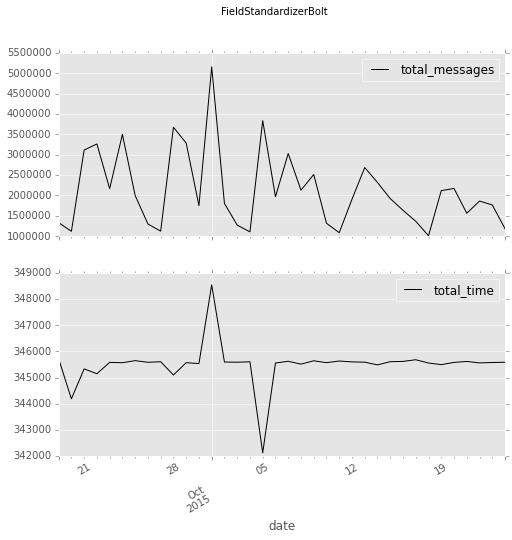

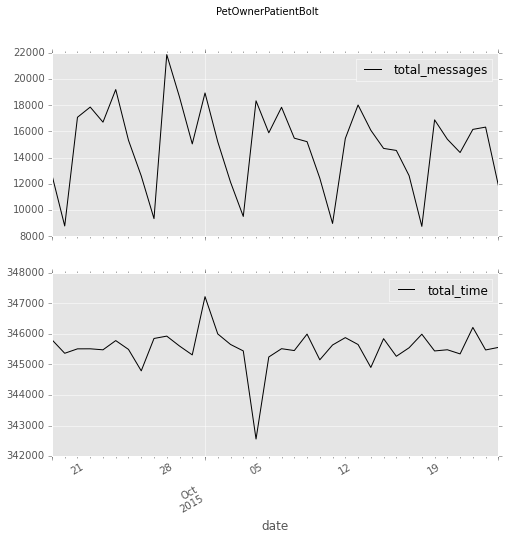

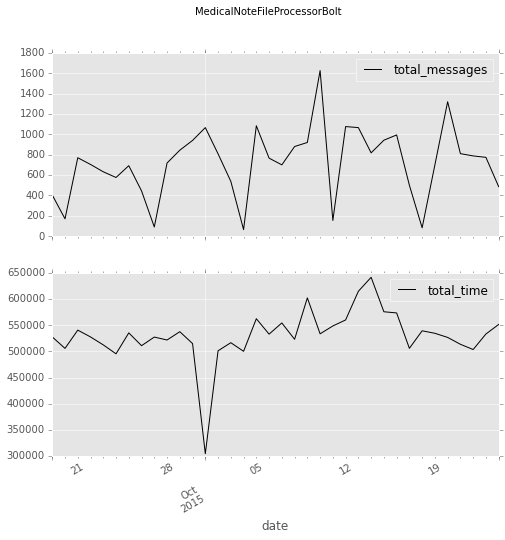

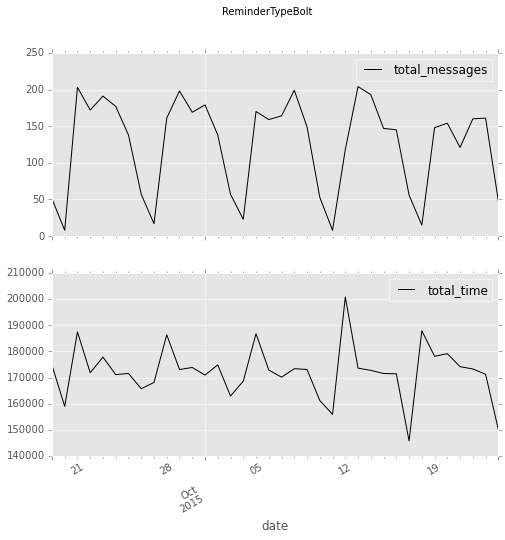

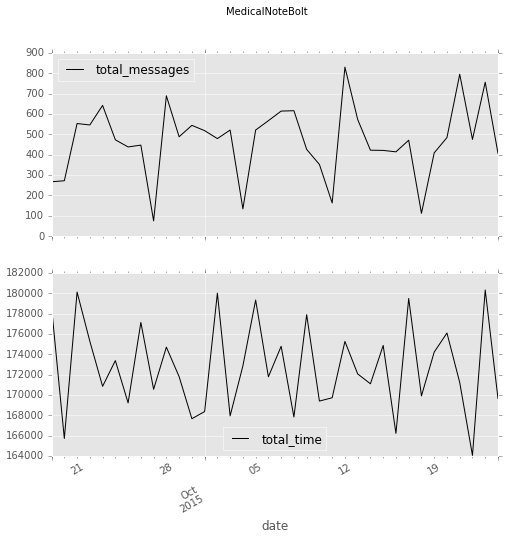

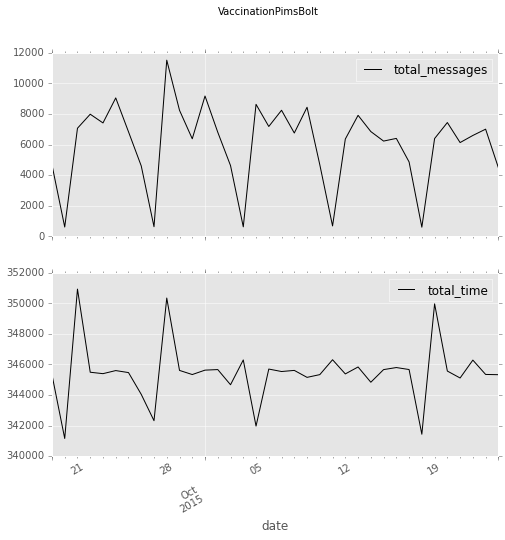

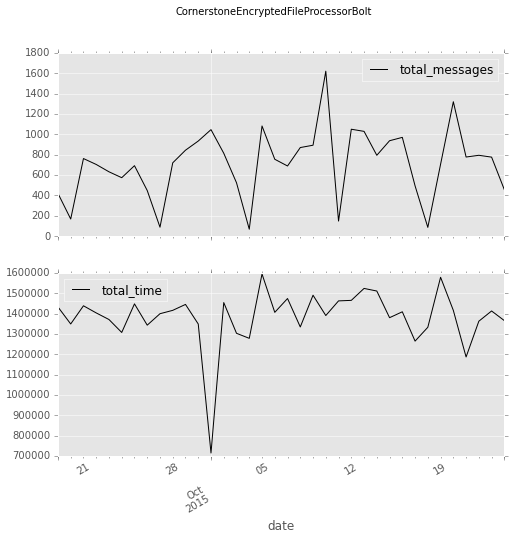

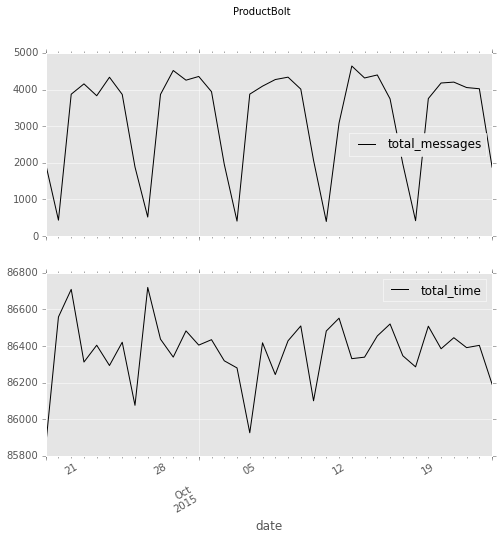

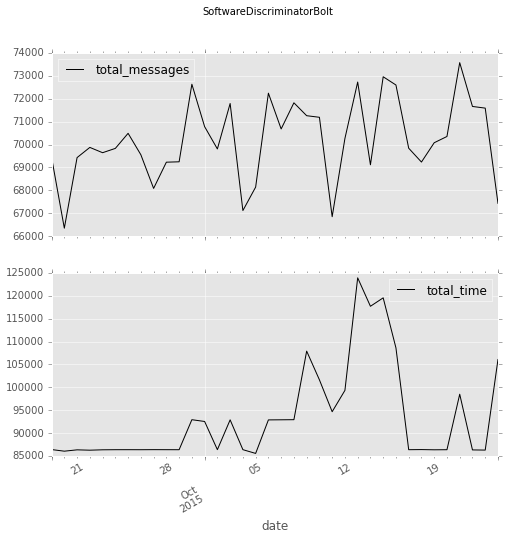

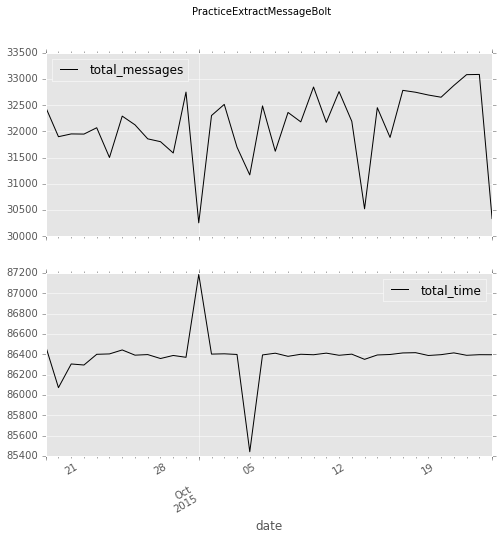

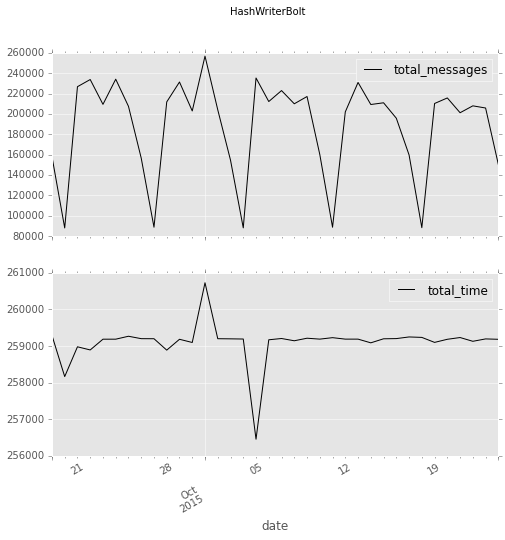

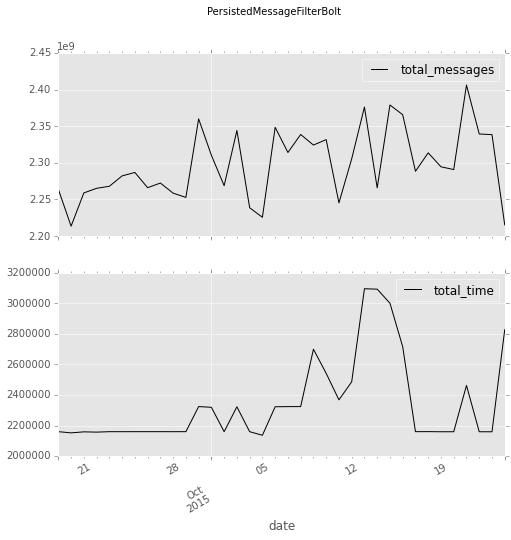

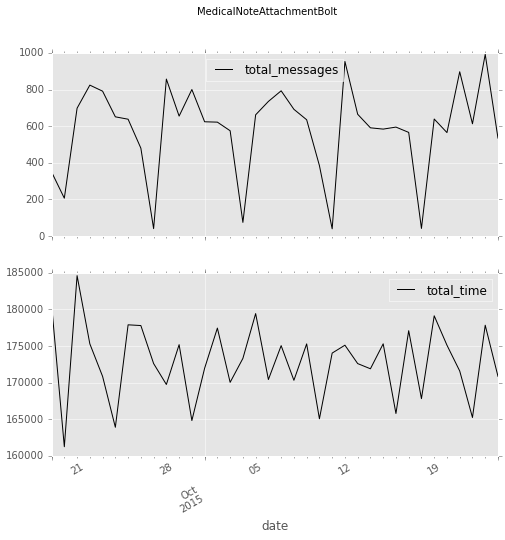

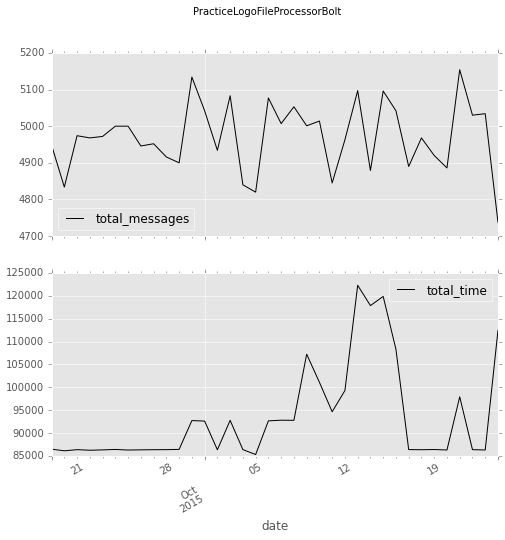

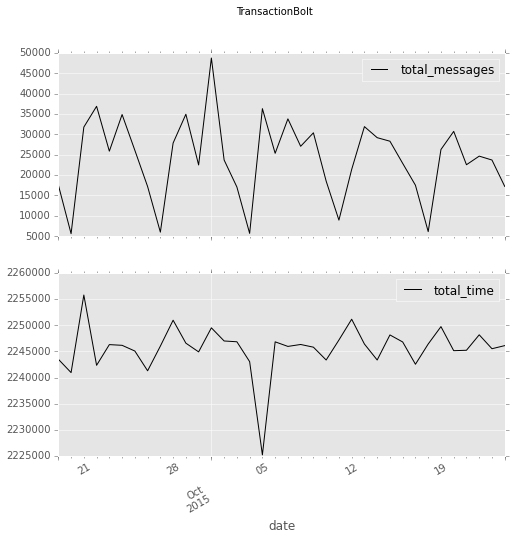

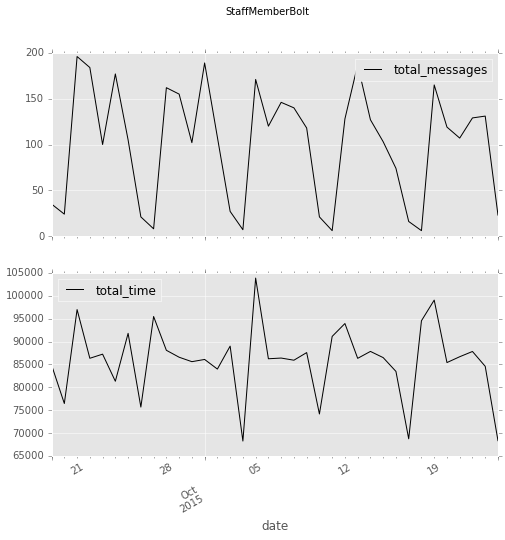

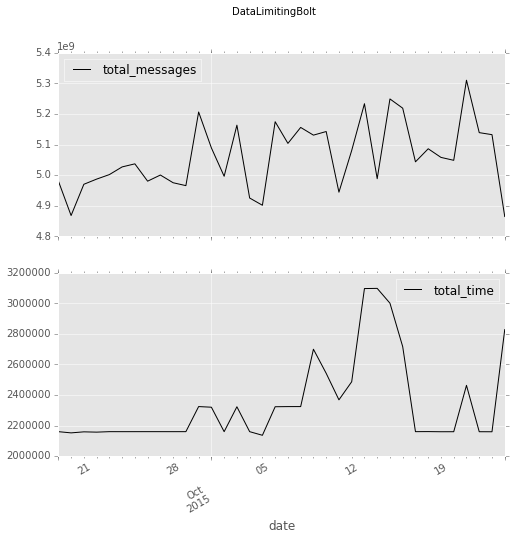

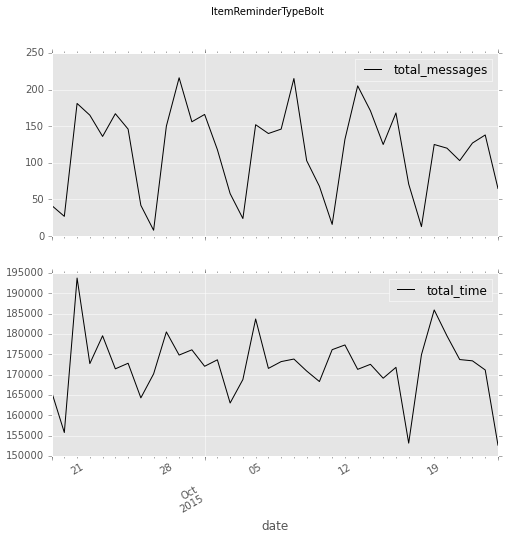

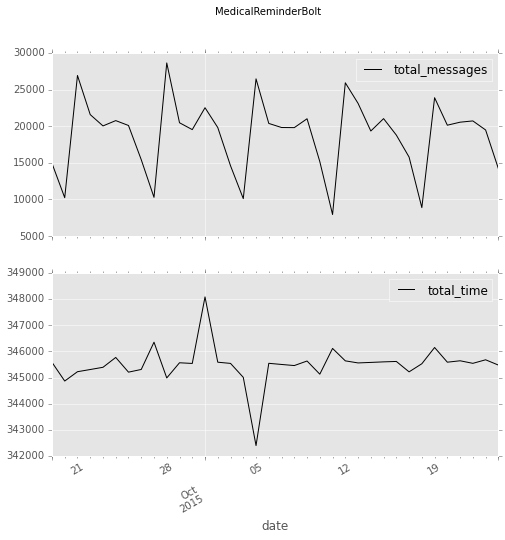

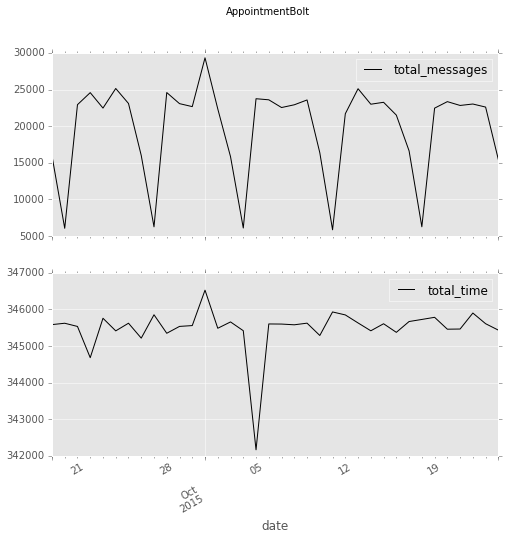

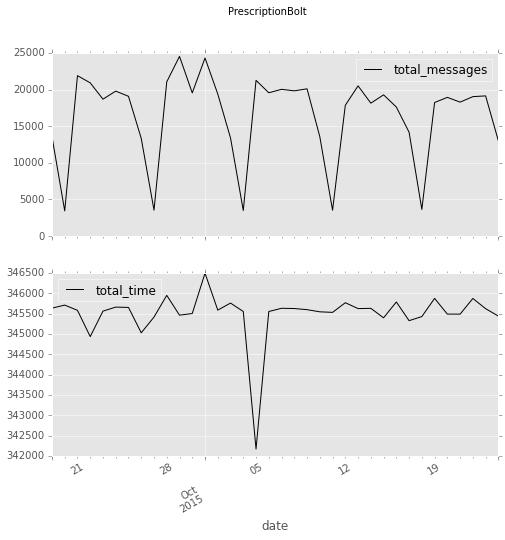

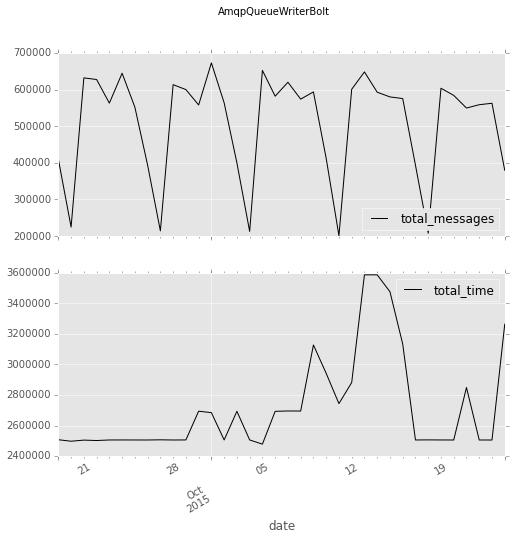

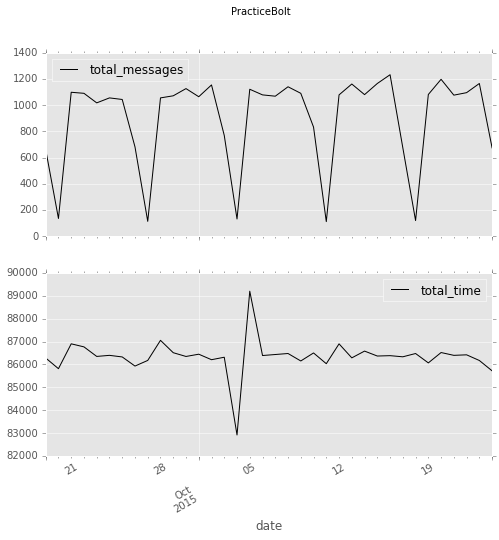

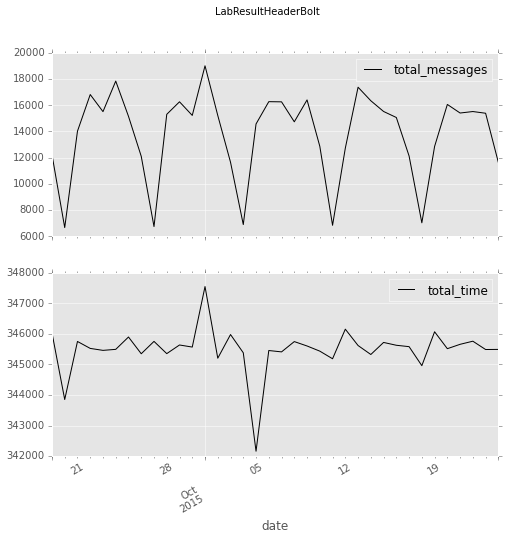

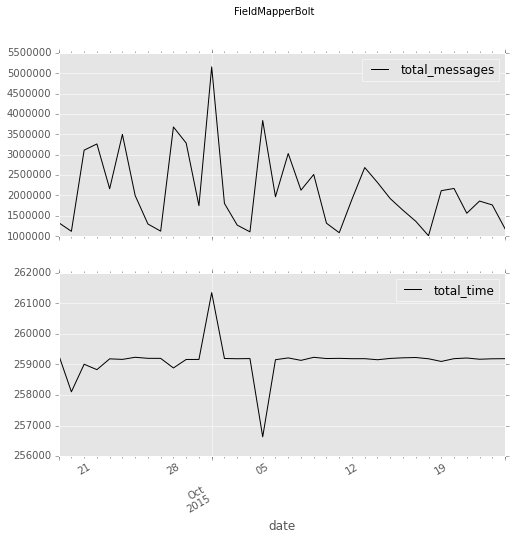

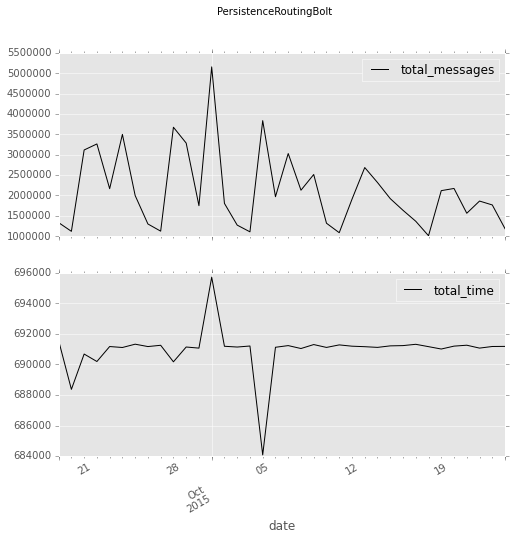

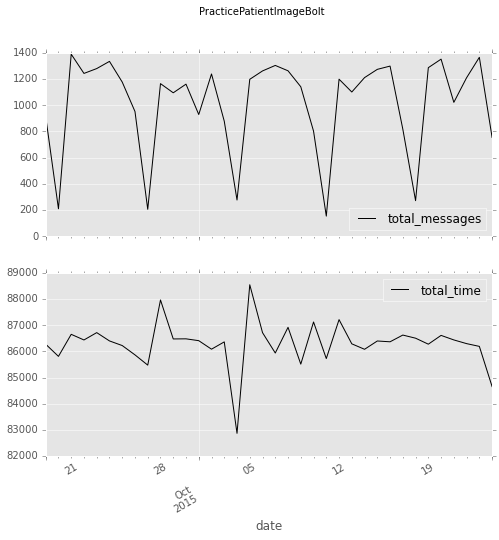

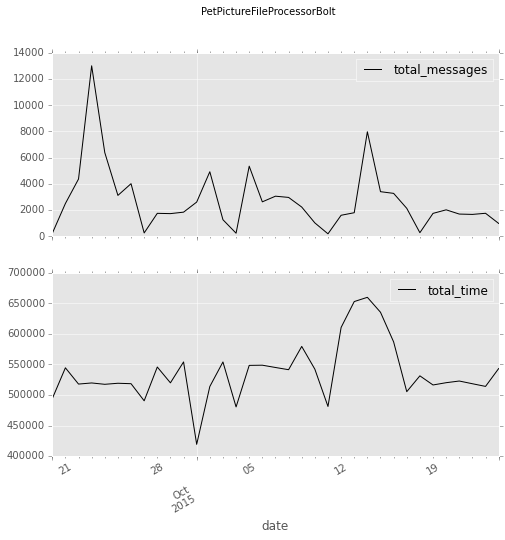

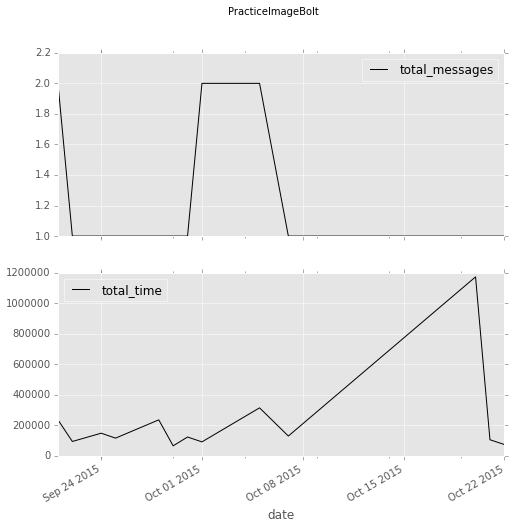

In [8]:
for boltName in pd.unique(boltData.bolt):
    df = boltData[boltData.bolt == boltName].set_index('date')
    plt.figure()
    df.plot(title=boltName, subplots=True, figsize=(8, 8))
    plt.legend(loc='best')
    plt.show()